# Aprendizaje Supervisado - Clasificación **(Arboles de Decisión - Método CART)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo
ruta = '/content/drive/MyDrive/METODOS_Y_MODELOS/5_Quinta_Sesion/6_Sexta_Sesion/Datos/Datos_Simulados_de_Calidad_del_Agua__30_muestras_.csv'
df = pd.read_csv(ruta)
df.head()

,ID,DBO,Oxigeno_disuelto,Calidad_Agua
0,1,3.934511,6.341497,Aceptable
1,2,7.679643,3.937883,Contaminada
2,3,6.257961,3.357784,Contaminada
3,4,5.391280,8.218870,Aceptable
4,5,2.514121,8.310976,Buena


In [4]:
# Conteo de clases
conteo_clases = df['Calidad_Agua'].value_counts()
conteo_clases

,count
Calidad_Agua,
Aceptable,11
Buena,10
Contaminada,9


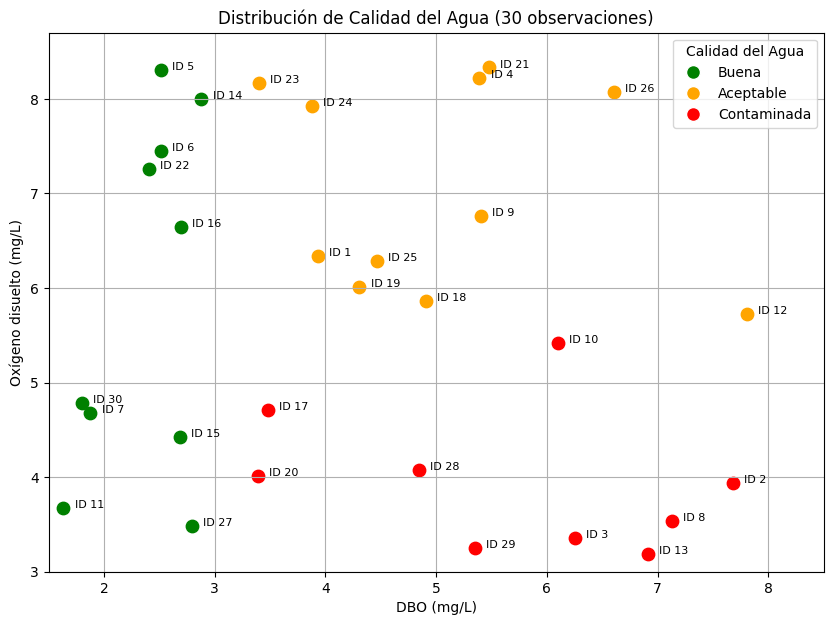

In [10]:
# Gráfico
plt.figure(figsize=(10, 7))
colores = {'Buena': 'green', 'Aceptable': 'orange', 'Contaminada': 'red'}

for i in range(len(df)):
    fila = df.iloc[i]
    plt.scatter(fila['DBO'], fila['Oxigeno_disuelto'],
                color=colores[fila['Calidad_Agua']], s=80)
    plt.text(fila['DBO'] + 0.1, fila['Oxigeno_disuelto'],
             f'ID {fila["ID"]}', fontsize=8)

plt.xlabel('DBO (mg/L)')
plt.ylabel('Oxígeno disuelto (mg/L)')
plt.title('Distribución de Calidad del Agua (30 observaciones)')
plt.grid(True)
plt.xlim(1.5, 8.5)
plt.ylim(3.0, 8.7)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label,
              markerfacecolor=color, markersize=10) for label, color in colores.items()],
           title='Calidad del Agua')
plt.show()


# Cáluclo del Índice Gini para el Nodo Raíz

In [6]:
# Conteo de clases
conteo_clases = df['Calidad_Agua'].value_counts()
conteo_clases

,count
Calidad_Agua,
Aceptable,11
Buena,10
Contaminada,9


In [14]:
# Conteo de clases
conteo_clases = df['Calidad_Agua'].value_counts()

# Cálculo del índice de Gini en el nodo raíz
total = len(df)
gini_raiz = 1 - ((conteo_clases[0] / total) ** 2 +
                 (conteo_clases[1] / total) ** 2 +
                 (conteo_clases[2] / total) ** 2)

print(conteo_clases, round(gini_raiz, 3))

Calidad_Agua
Aceptable      11
Buena          10
Contaminada     9
Name: count, dtype: int64 0.664


<ipython-input-14-eb74484b47fa>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gini_raiz = 1 - ((conteo_clases[0] / total) ** 2 +
<ipython-input-14-eb74484b47fa>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (conteo_clases[1] / total) ** 2 +
<ipython-input-14-eb74484b47fa>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (conteo_clases[2] / total) ** 2)


# Cáculo del Arbol de Decisión con Python

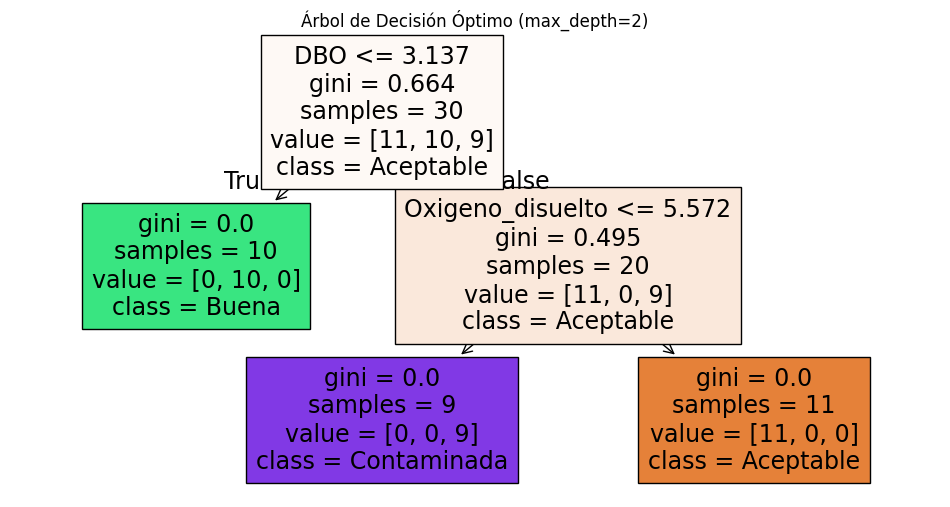

In [17]:
from sklearn.tree import plot_tree, DecisionTreeClassifier

# Variables predictoras y objetivo
X = df[['DBO', 'Oxigeno_disuelto']]
y = df['Calidad_Agua']

# Entrenar el mejor árbol de decisión con toda la data
mejor_arbol = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
mejor_arbol.fit(X, y)

# Visualizar el árbol
plt.figure(figsize=(12, 6))
plot_tree(mejor_arbol, feature_names=X.columns, class_names=mejor_arbol.classes_, filled=True)
plt.title("Árbol de Decisión Óptimo (max_depth=2)")
plt.show()

## Interpretación general del árbol de decisión

El árbol de decisión construido a partir del método **CART** (Classification and Regression Trees) permite clasificar la **calidad del agua** en tres categorías: **Buena**, **Aceptable** y **Contaminada**, utilizando únicamente dos variables clave: **Demanda Biológica de Oxígeno (DBO)** y **Oxígeno Disuelto**.

Este modelo representa un conjunto de reglas simples pero ambientalmente coherentes:

- Si la **DBO es baja** (menor a 3.0 mg/L), el agua se clasifica directamente como **Buena**, lo cual refleja un bajo contenido de materia orgánica y, por tanto, buena calidad ambiental.
- Si la **DBO es igual o mayor a 3.0 mg/L**, el nivel de **oxígeno disuelto** se convierte en el factor determinante:
  - Si el **oxígeno disuelto es mayor a 5.5 mg/L**, la calidad se considera **Aceptable**.
  - Si el **oxígeno disuelto es igual o menor a 5.5 mg/L**, se clasifica como **Contaminada**, ya que la combinación de alta DBO y bajo oxígeno suele indicar un entorno degradado.

Este árbol de decisión presenta una **precisión aproximada del 90%** y es fácilmente interpretable, lo que lo hace útil tanto para **aplicaciones técnicas como educativas**. Además, resume de manera clara y lógica cómo los niveles de contaminación orgánica y oxigenación determinan la calidad del agua.

En resumen, este modelo demuestra cómo la inteligencia artificial puede **traducir datos ambientales en reglas de decisión simples** que pueden apoyar la toma de decisiones en **monitoreo ambiental**, **gestión de recursos hídricos** y **educación ambiental**.


# Predecir: Clasificar nuevos datos

In [18]:
# Leer el archivo
ruta = '/content/drive/MyDrive/METODOS_Y_MODELOS/5_Quinta_Sesion/6_Sexta_Sesion/Datos/Predicciones_del__rbol_de_Decisi_n.csv'
df_nuevo =  pd.read_csv(ruta)

df_nuevo

,DBO,Oxigeno_disuelto
0,2.5,7.5
1,3.2,6.0
2,4.0,4.5
3,6.0,3.8
4,3.1,5.0
5,2.9,6.8
6,5.0,5.6


In [ ]:
# Asegúrate de que tenga las columnas correctas
print(df_nuevo.columns)

# Predecir la calidad del agua con el árbol ya entrenado
predicciones = mejor_arbol.predict(df_nuevo)
df_nuevo['Prediccion_Calidad'] = predicciones

# Mostrar el DataFrame con las predicciones
df_nuevo


Index(['DBO', 'Oxigeno_disuelto'], dtype='object')


,DBO,Oxigeno_disuelto,Prediccion_Calidad
0,2.5,7.5,Buena
1,3.2,6.0,Aceptable
2,4.0,4.5,Contaminada
3,6.0,3.8,Contaminada
4,3.1,5.0,Buena
5,2.9,6.8,Buena
6,5.0,5.6,Aceptable
